In [ ]:
2020-11-15 12:27:14 

Netflix, Inc. is an American technology and media services provider and production company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television series, including those produced in-house.(*Wikepedia*)

This noteboook is the first of two notebooks where I will perform exploratory data analysis on Netflix Movies and TV Shows data. The data used in this notebook was downloded from Kaggle and can be found [here](https://www.kaggle.com/shivamb/netflix-shows).

# Importing Libraries

Let's import all the necessary packages first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import ipywidgets as widgets
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
init_notebook_mode(connected=True)
print('Packages Imported Successfully!')

Packages Imported Successfully!


# Import the Data
Here we import the data we will be working with. The datasets we will be importing are as follows:
    
   - 'netflix_titles.csv' as df

In this notebook we will only be looking at movie data so we will only use a subset of the data where the 'type' is 'Movie'.

In [3]:
df = pd.read_csv('netflix_titles.csv')
series = df[df['type']=='TV Show'] # select only the movies

print('Data Successfully imported!')

Data Successfully imported!


# Confirmatory Data Analysis

Let's take a look at our data to ensure that everything is as should be.
  
  - Data Info
    - The first and last five rows of the data
    - The shape of the dataframe, this includes the number of columns and rows
    - The names of the columns in the dataframe and their respective data types
  
  - Null values : number of cells with NaN values
   

## Data Info

In [4]:
series.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [5]:
series.shape

(1969, 12)

In [6]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 2 to 6233
Data columns (total 12 columns):
show_id         1969 non-null int64
type            1969 non-null object
title           1969 non-null object
director        128 non-null object
cast            1759 non-null object
country         1688 non-null object
date_added      1959 non-null object
release_year    1969 non-null int64
rating          1967 non-null object
duration        1969 non-null object
listed_in       1969 non-null object
description     1969 non-null object
dtypes: int64(2), object(10)
memory usage: 200.0+ KB


## Missing Values
Now, let's see if we have any missing values in our dataset. 

Text(0, 0.5, 'Null Values')

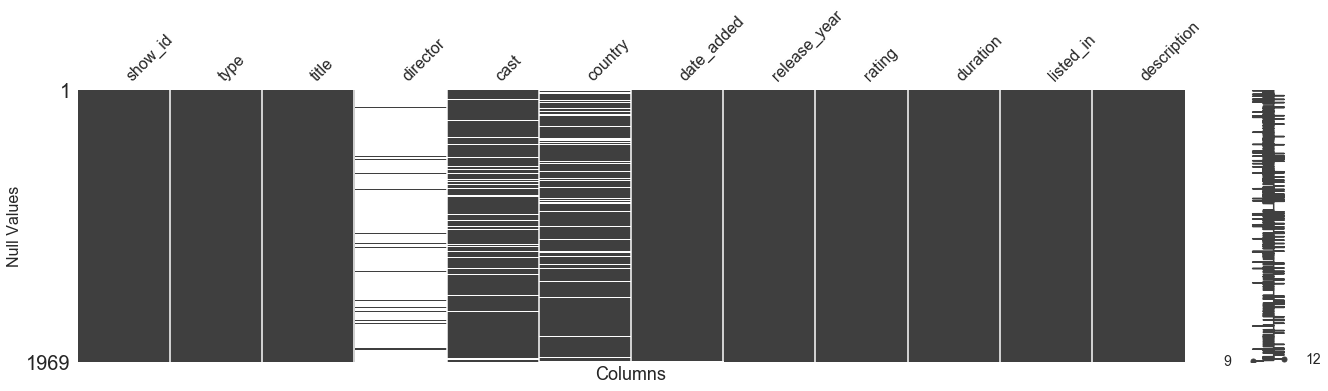

In [7]:
import missingno
missingno.matrix(series, figsize=(22,5))
plt.xlabel('Columns', fontsize=18)
plt.ylabel('Null Values', fontsize=16)

As we can see from the visual above, the ***director***, ***cast***, and ***country*** columns have some missing values that are clearly dissernable. But this does not give any information on how many rows in these columns have missing values. We'll use the function defined below to show the number of missing values in each of the identified columns and what percentage of the data is missing.

In [8]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [9]:
missing_values_table(series)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
director,1841,93.5
country,281,14.3
cast,210,10.7
date_added,10,0.5
rating,2,0.1


The number of missing values in these columns is not so high that it could affect our analysis of the data. And since each movie is unique, we won't impute any of the missing values as it will affect the quality of the data. We will also not be dropping any of the NaN values.

In [10]:
series = series.drop('director', axis=1)
series.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


# Exploratory Data Analysis
In this section we look at how our features interact to and relate with each other. The features we will be using in our analysis are:
  - Title
  - Cast
  - Duration
  - Director
  - Genres (listed_in)
  - Release Year
  - Rating

## Which Movies Have The Shortest and Longest Durations?


Let us look at all the unique movie durations in the data frame as the 'duration' column is listed as a text column.

In [11]:
# show the number of unique movie durations
print(set(series['duration']))

{'1 Season', '4 Seasons', '12 Seasons', '6 Seasons', '15 Seasons', '3 Seasons', '7 Seasons', '8 Seasons', '13 Seasons', '2 Seasons', '14 Seasons', '11 Seasons', '9 Seasons', '5 Seasons', '10 Seasons'}


All values are reported as strings and the duration is measured in minutes. Let’s remove ‘min’ from the string values and convert the result to integers:

In [12]:
# strip the 'min' from the movie duration
series['duration'] = series['duration'].map(lambda x: x.rstrip('Seasons')).astype(int)
print(set(series['duration']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


Now that we have our movie durations in the right format we can generate some summary statistics to look at the longest, shortest and average duration of the movies in our data. 

In [15]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print('The shortest series in the dataset is ', round(series['duration'].min(),2), ' seasons long' 
 '\nThe longest series in the dataset is ', round(series['duration'].max(),2), ' seasons long'
 '\nThe average runtime for movies in the dataset is ', round(series['duration'].mean(),2), ' seasons long')

The shortest series in the dataset is  1  seasons long
The longest series in the dataset is  15  seasons long
The average runtime for movies in the dataset is  1.78  seasons long


The average runtime of movies in this dataset is 99.1 minutes, which approximates to 1 hour 39.1 minutes, which is the standard duration of a movie.

From my research I found that 'Cleopatra (1963)', is the longest Hollywood movie ever released with a runtime of 248 minutes, or ~4 hours and 8 minutes. Our data shows the longest movie having a duration of 312 minutes, or 5 hours and 12 minutes which is ~1 hour longer than the longest recorded movie duration. This means that the entry is incorrect and the correct runtime for 'Black Mirror: Bandersnatch' is shown in the image below. 

<img src="Screenshot (28).png">

So let's fix this error before we move on to the next step.

In [109]:
# change the duration from 312 to 90
movies.loc[movies['show_id'] == 80988062, 'duration'] = 90

In [16]:
series[series['duration'] == 15]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
5908,70140391,TV Show,Grey's Anatomy,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"June 15, 2019",2018,TV-14,15,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
5974,70142386,TV Show,NCIS,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


Now that we've fixed this error we have to re-check the summary statistics but this time we'll only calculate the mean and maximum durations.

In [13]:
print('The longest movie in the dataset is ', round(movies['duration'].max(),2), ' minutes long'
 '\nThe average runtime for movies in the dataset is ', round(movies['duration'].mean(),2), ' is minutes')

The longest movie in the dataset is  228  minutes long
The average runtime for movies in the dataset is  99.05  is minutes


In [14]:
# looking at the details for the movie with the longest runtime/duration
# details are correct as per IMDb
movies[movies['duration'] == 228] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4227,60002818,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...


Now that we've confirmed that the information is correct we can move on to finding the ten titles with the longest runtime. The first step is to use a function to return the shortest and longest movies.

In [18]:
#use the function 'idmin' to find the index of shortest movie.
#use the function 'idmax' to find the index of longest movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of shortest movie.
    min_index = series[x].idxmin()
    #use the function 'idmax' to find the index of longest movie.
    high_index = series[x].idxmax()
    high = pd.DataFrame(series.loc[high_index,:])
    low = pd.DataFrame(series.loc[min_index,:])
    
    #print the movie with high and low duration
    print("TV Show Which Has Longest "+ x + " : ",series['title'][high_index])
    print("TV Show Which Has Shortest "+ x + "  : ",series['title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('duration')

TV Show Which Has Longest duration :  Grey's Anatomy
TV Show Which Has Shortest duration  :  Transformers Prime


,5908,2
show_id,70140391,70234439
type,TV Show,TV Show
title,Grey's Anatomy,Transformers Prime
cast,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...","Peter Cullen, Sumalee Montano, Frank Welker, J..."
country,United States,United States
date_added,"June 15, 2019","September 8, 2018"
release_year,2018,2013
rating,TV-14,TV-Y7-FV
duration,15,1
listed_in,"Romantic TV Shows, TV Dramas",Kids' TV


The image below confirms that the movie 'Silent', released in 2014, is indeed the shortest movie at 3 minutes long.

<img src="Screenshot (26).png">

As we can see, ***'Sangam'***  has the longest runtime and ***'Silent'***  has the shortest runtime. Next we will extract the top 10 longest movies.

In [20]:
durations = pd.DataFrame(series['duration'].sort_values(ascending = False))
durations['title'] = series['title']

In [21]:
durations.head(10)

,duration,title
5974,15,NCIS
5908,15,Grey's Anatomy
5787,14,Supernatural
6229,13,Red vs. Blue
6021,13,COMEDIANS of the world
5843,12,Trailer Park Boys
5879,12,Criminal Minds
6174,11,Heartland
6225,11,Frasier
5976,11,Cheers


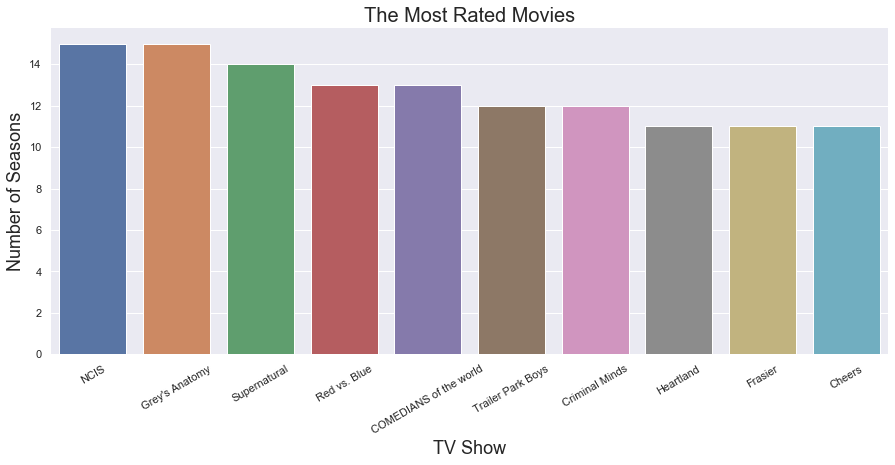

In [38]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=durations[0:10],y='duration',x='title')
# Add a legend and informative axis label
ax.set(ylabel="Number of Seasons",
       xlabel="TV Show")
ax.set_title('The Most Rated Movies',fontsize = 20)
plt.xticks(rotation=30)
sns.despine(left=True, bottom=True)

#plt.xticks(rotation=30)

#setup the figure size
sns.set(rc={'figure.figsize':(16,10)})
#setup the title and labels of the plot.
ax.set_xlabel("TV Show",fontsize = 18)
ax.set_ylabel("Number of Seasons",fontsize = 18)
sns.set_style("darkgrid")


## Which country produces the most TV Shows?
Let us now look at how the movie ratings are distributed.

In [136]:
def count_country(x):
    #concatenate all the rows of the genres.
    data_plot = series[x].str.cat(sep = ',')
    
    def new(data_plot):
        b = []
        data = data_plot.split(',')
        for i in data:
            i = i.lstrip()
            b.append(i)
        return b

    plot = pd.Series(new(data_plot))
    #data = pd.Series(plot.split(','))
    #counts each of the genre and return.
    info = plot.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
countries = pd.DataFrame(count_country('country'))
countries.reset_index(drop=False, inplace=True)
countries.rename(columns={'index':'country','0':'count'},inplace=True)
countries.head(10)

,country,0
0,United States,686
1,United Kingdom,223
2,Japan,156
3,South Korea,116
4,Canada,107
5,France,70
6,Taiwan,65
7,India,55
8,Australia,50
9,Spain,45


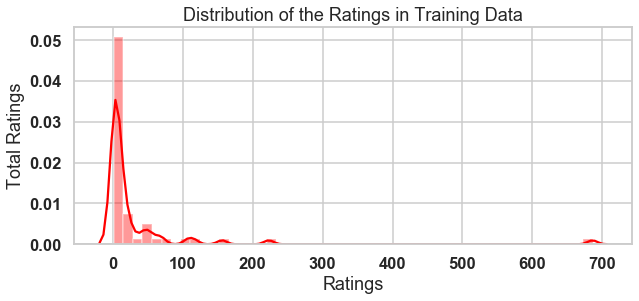

In [172]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid", context="talk")
sns.distplot(countries[0],bins=50,kde=True,color='red')
plt.title('Distribution of the Ratings in Training Data')
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings')   
plt.show()

Country With The Most TV Shows Produced in it is United States with a count of 686


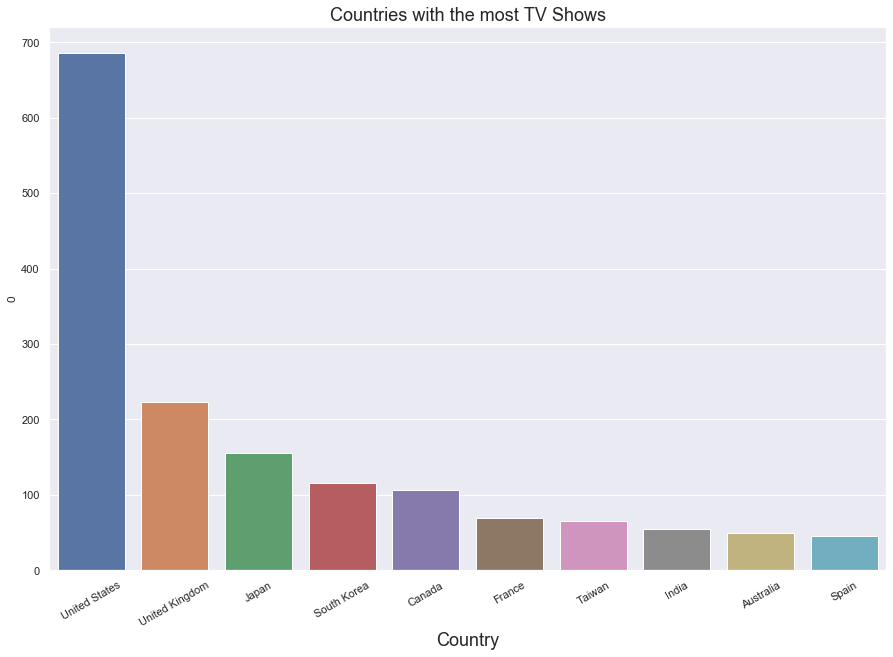

In [139]:
#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.barplot(x=countries['country'][:10],
                 y=countries[0][:10])

plt.xticks(rotation=30)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Countries with the most TV Shows",fontsize = 18)
ax.set_xlabel("Country",fontsize = 18)
sns.set_style("darkgrid")

print("Country With The Most TV Shows Produced in it " + "is",
        countries['country'][0] + " with a count of", countries.loc[0][0])

From the visual above we see that most of the movies in the dataset are rated TV-
ma, but what does this mean? Programming rated TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences. Programs with this rating are usually not suitable for minors under 17 years of age (18 in some cases). Content may contain strong coarse language, explicit (in some cases, pornographic) strong sexual content, nudity, or intense/graphic violence.

For a better understanding of what the other ratings mean, please click [here](https://findanyanswer.com/what-does-adult-mean-on-netflix). Let's see in what proportions the ratings are distributed

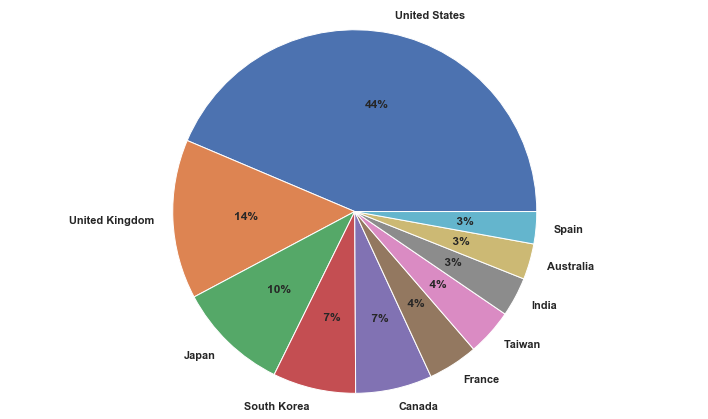

In [146]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 6))
ax.pie(countries[0][:10], labels=countries['country'][:10],
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

## In Which Year Were The Most Movies Added To Netflix?

Before we can do our analysis, we have to get our data in the correct format. In this sectoin there are two questions we want to answer:
  - 1. In which year were the most movies released?
  - 2. In which year were the most movies added to Netflix?
  
But the core question that we want to answer here is the second.

#### In which year were the most movies released?

In [171]:
# change the 'release_year' column to datetime
pd.to_datetime(movies['release_year'], format='%Y')

0      2019-01-01
1      2016-01-01
4      2017-01-01
6      2014-01-01
7      2017-01-01
          ...    
5577   2007-01-01
5578   2015-01-01
5579   2014-01-01
5580   2015-01-01
6231   2016-01-01
Name: release_year, Length: 4265, dtype: datetime64[ns]

Next, we create a dataframe that returns the number of movies that were released in each year.

In [172]:
year_df = pd.DataFrame(movies.groupby('release_year')['title'].count()).reset_index()
year_df.rename(columns={'title': 'num_of_titles'}, inplace=True)
year_df.sort_values(by='release_year', ascending=False)
year_df.head()

,release_year,num_of_titles
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,2


In [173]:
trace1 = go.Scatter(x=year_df.release_year,
                    y=year_df.num_of_titles,
                    name = 'Number of Movies Released per Year, 1942-2020',
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='Number of Movies Released per Year, 1942-2020',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

It seems that an the only noticable change in movie releases occcurs in **1960** but it's not really a signifficant inxrease. The biggest change we see is in **1974** where the graph takes on an expobebtial shape and continues to follow the same trend unti it's peak in **2017** where there were **682** movies released. The numbers drop drastically after that. While we would expect **2020** to have more than **6 movie releases**, we can attribute this number to the fact that the dataset is quite outdated and with the international **Covid-19** outbreak earlier this year, most of the world has been on lockdown and this has had an effect on movie production.

#### In which year were the most movies added to Netflix?

In [365]:
def count_drop(x):
    #concatenate all the rows of the genres.
    data_plot = movies[x].str.cat(sep = ',')
    
    def new(data_plot):
        b = []
        data = data_plot.split(',')
        for i in data:
            if len(i)==5 and i[0] != 'M':
                i = i.lstrip()
                b.append(i)
        return b

    plot = pd.Series(new(data_plot))
    #data = pd.Series(plot.split(','))
    #counts each of the genre and return.
    info = plot.value_counts(ascending=False)
    return info

count_drop('date_added')

2019    1546
2018    1290
2017     913
2016     264
2020     147
2015      58
2014      19
2011      13
2013       6
2012       4
2009       2
2008       1
2010       1
dtype: int64

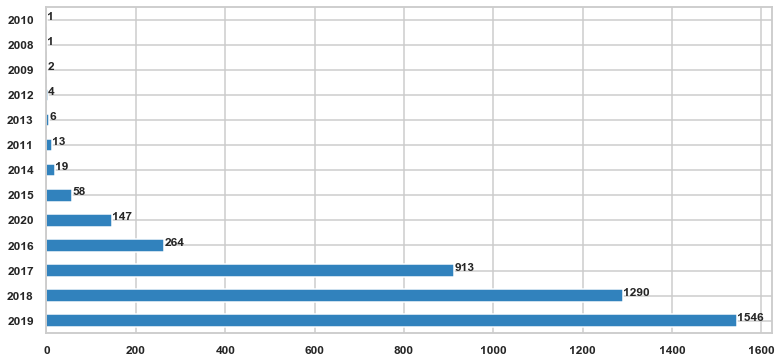

In [394]:
date_added = count_drop('date_added')

date_added.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')
for index,value in enumerate(date_added):
    plt.text(value, index, str(value))
    plt.rc('font', size=12)

## Whats Is The Number Of Movies In Each Genre? 


In [206]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = series[x].str.cat(sep = ',')
    
    def new(data_plot):
        b = []
        data = data_plot.split(',')
        for i in data:
            i = i.lstrip()
            b.append(i)
        return b

    plot = pd.Series(new(data_plot))
    
    #counts each of the genre and return.
    info = plot.value_counts(ascending=False)
    
    return info

#call the function for counting the movies of each genre.
total_genre_tv = count_genre('listed_in')[:10]
total_genre_tv

International TV Shows    1001
TV Dramas                  599
TV Comedies                436
Crime TV Shows             363
Kids' TV                   328
Docuseries                 279
Romantic TV Shows          278
British TV Shows           210
Reality TV                 153
Korean TV Shows            132
dtype: int64

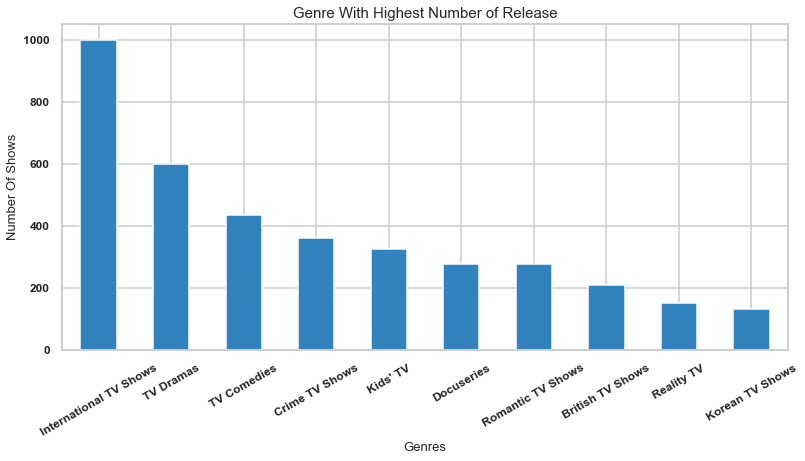

In [207]:
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_tv.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c', subplots=True)

plt.xticks(rotation=30)

#setup the title and the labels of the plot.
plt.title("Genre With Highest Number of Release",fontsize=15)
plt.xlabel("Genres",fontsize=13)
plt.ylabel('Number Of Shows',fontsize= 13)
sns.set_style("whitegrid")

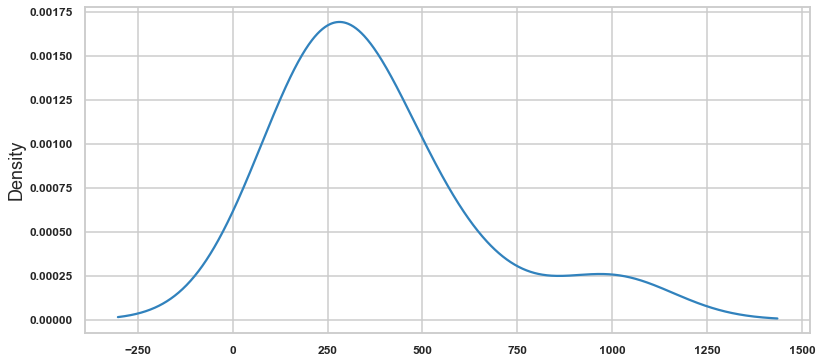

In [208]:
total_genre_tv.plot(kind= 'density',figsize = (13,6),fontsize=12,colormap='tab20c')

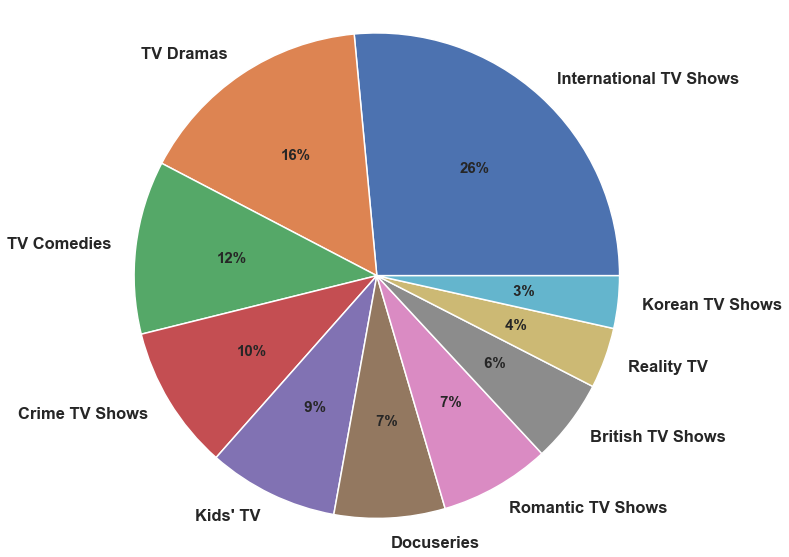

In [209]:
i = 0
genre_count = []
for genre in total_genre_tv.index:
    genre_count.append([genre, total_genre_tv[i]])
    i = i+1
    
plt.rc('font',size=15, weight='bold')
f, ax = plt.subplots(figsize=(10, 8))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)


ax.axis('equal')
plt.tight_layout()


## Which Actors Have The Most Movie Credits?
Let us see which actors appear the most in our dataset. We will use the same function as above.

In [427]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [173]:
def count_actor(x):
    #concatenate all the rows of the genres.
    data_plot = series[x].str.cat(sep = ',')
    df = pd.Series(data_plot.split(','))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

count_actor('cast')

 Takahiro Sakurai     18
David Attenborough    14
 Yuki Kaji            14
 Tomokazu Sugita      12
 Ai Kayano            11
                      ..
 José Julián           1
 Young Dais            1
 Cristina Vee          1
 Aleksey Zorin         1
 Aruna Irani           1
Length: 11870, dtype: int64

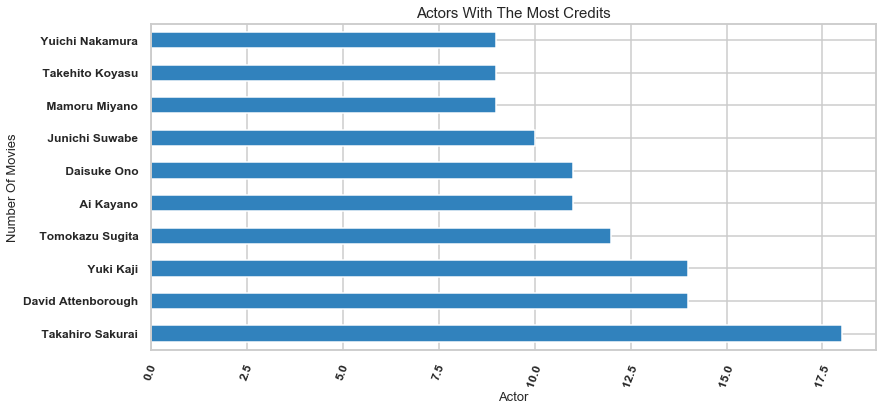

In [174]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_films = count_actor('cast')

#plot the barh plot.
count_actor_films.iloc[:10].plot.barh(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Actors With The Most Credits",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

## Director With The Most Movie Credits

In [435]:
count_director_movies =  pd.DataFrame(movies.groupby('director')['show_id'].count()).reset_index()
count_director_movies.rename(columns={'show_id':'title_count'}, inplace=True)
count_director_movies = count_director_movies.sort_values(by='title_count', ascending=False)

In [436]:
count_director_movies

,director,title_count
2421,"Raúl Campos, Jan Suter",18
1835,Marcus Raboy,14
1248,Jay Karas,13
1246,Jay Chapman,12
1891,Martin Scorsese,9
...,...,...
1394,John Michael McDonagh,1
1395,"John Mikulak, Joshua Brown",1
1396,John Milius,1
1397,John Murlowski,1


Above we have a dataframe showing directors and the number of movies each of them directed. We will ignore the first entry as it does not give any valuable or interpretable informations. Below we will visualise this information.

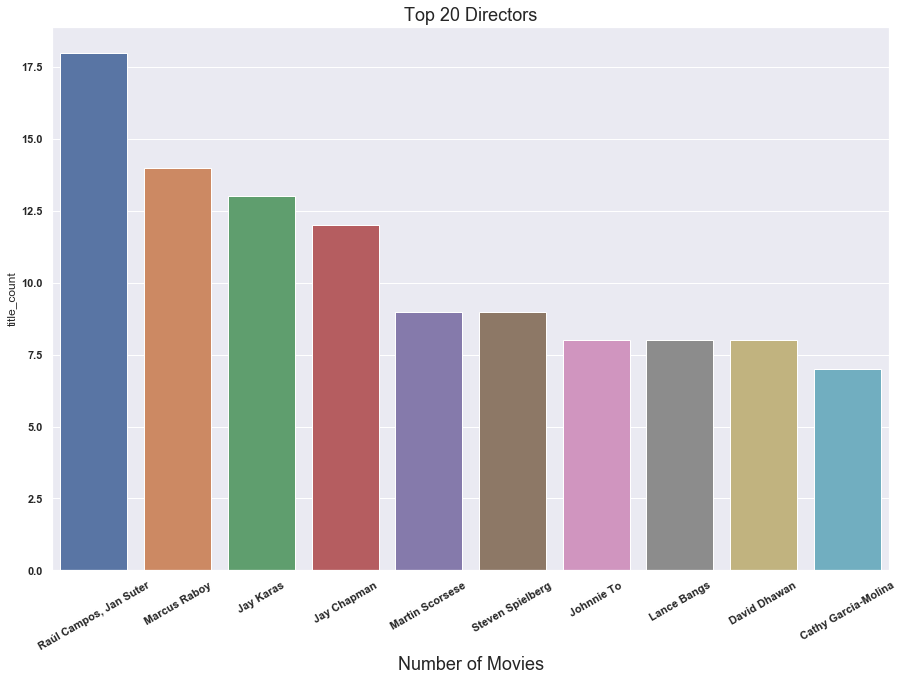

In [442]:
#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.barplot(x=count_director_movies['director'][:10],
                 y=count_director_movies['title_count'][:10])

plt.xticks(rotation=30)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Top 20 Directors",fontsize = 18)
ax.set_xlabel("Number of Movies",fontsize = 18)
sns.set_style("darkgrid")

## Most Common Plot Keyword

Let's look at the plot keywords that appear the most in our dataset.

In [175]:
#imdb['plot_keywords'] = imdb['plot_keywords'].fillna(imdb['plot_keywords'].mode(), inplace=True)
def count_words(x):
    #concatenate all the rows of the genres.
    data_plot = movies[x].str.cat(sep = ',')
    df = pd.Series(data_plot.split(','))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

keywords = count_words('cast')

i = 0
keyword_occurences = []
for p in keywords.index:
    keyword_occurences.append([p, keywords[i]])
    i = i+1

In [176]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


(-0.5, 999.5, 299.5, -0.5)

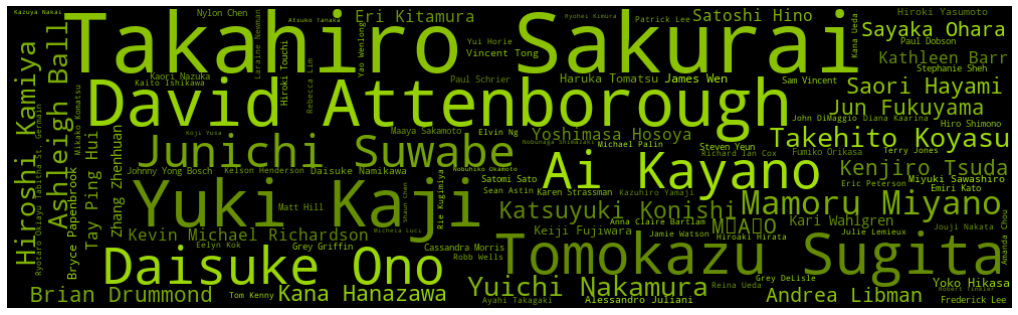

In [177]:
from wordcloud import WordCloud, STOPWORDS
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

# References

'Exploratory Data Analysis of Netflix Data', Sadrach Pierre, Ph.D.
Mar 23, 2020
https://towardsdatascience.com/exploring-netflix-data-in-python-eb03e8f3944c

EDSA Movie Recommender Challenge, Team_8_CPT:TheDreamTeam, 'Analyze This'(Kaggle Notebook), 2020

'Netflix Movies and TV shows:Movies and TV Shows listings on Netflix', Shivam Bansal [here](https://www.kaggle.com/shivamb/netflix-shows)